Base de donnéé

In [11]:
# Base de données pour les types de bois avec f_md issu directement des valeurs des tableaux
parametres_bois = {
    "C16": {"f_md": 9.4, "E_0_05": 5400, "E_0_mean": 11000},
    "C24": {"f_md": 14.1, "E_0_05": 7000, "E_0_mean": 11000},
    "C30": {"f_md": 17.6, "E_0_05": 8000, "E_0_mean": 12000},
    "D30": {"f_md": 17.6, "E_0_05": 8000, "E_0_mean": 12000},
    "GL20h": {"f_md": 13.3, "E_0_05": 7000, "E_0_mean": 11000},
    "GL24h": {"f_md": 16.0, "E_0_05": 9100, "E_0_mean": 11500},
    "GL24c": {"f_md": 16.0, "E_0_05": 9100, "E_0_mean": 11500},
    "GL28h": {"f_md": 18.7, "E_0_05": 10500, "E_0_mean": 14200},
    "GL28c": {"f_md": 18.7, "E_0_05": 10500, "E_0_mean": 14200},
    "GL32h": {"f_md": 21.3, "E_0_05": 11200, "E_0_mean": 15400},
    "GL32c": {"f_md": 21.3, "E_0_05": 11200, "E_0_mean": 15400}
}

# Dimensions standard
dimensions_standard = {
    "Bois Massif": [
        (60, [100, 120, 140, 160, 180, 200]),
        (80, [100, 120, 140, 160, 180, 200, 220, 240]),
        (100, [100, 120, 140, 160, 180, 200, 220, 240, 260, 280]),
        (120, [120, 140, 160, 180, 200, 220, 240, 260, 280, 300]),
        (140, [140, 160, 180, 200, 220, 240, 260, 280, 300]),
        (160, [160, 180, 200, 220, 240, 260, 280, 300]),
        (180, [180, 200, 220, 240, 260, 280, 300]),
        (200, [200, 220, 240, 260, 280, 300]),
        (220, [220, 240, 260, 280, 300]),
        (240, [240, 260, 280, 300])
    ],
    "BLC": [
        (100, [120, 160, 200, 240, 280, 320, 360, 400, 440]),
        (120, [160, 200, 240, 280, 320, 360, 400, 440, 480]),
        (140, [200, 240, 280, 320, 360, 400, 440, 480, 520, 560]),
        (160, [240, 280, 320, 360, 400, 440, 480, 520, 560, 600]),
        (180, [280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680]),
        (200, [320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720]),
        (220, [360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760]),
        (240, [400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800]),
        (260, [440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840]),
        (280, [480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880]),
        (300, [520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920]),
        (320, [560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960]),
        (340, [600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000]),
        (360, [640, 680, 720, 760, 800, 840, 880, 920, 960, 1000, 1040]),
        (380, [680, 720, 760, 800, 840, 880, 920, 960, 1000, 1040, 1080]),
        (400, [720, 760, 800, 840, 880, 920, 960, 1000, 1040, 1080, 1120]),
    ]
}

# Flexion mono axiale 

vérification

In [12]:
import math


def calcul_flexion_monoaxiale(moment_flechissant_Nm, largeur, hauteur, type_bois, classe_humidite, duree_application, ksys=1.0):
    """
    Calcule la vérification à la flexion monoaxiale avec les paramètres SIA 265 - 4.2.9.

    Arguments :
    - moment_flechissant_Nm : Moment fléchissant My,Ed (Nm)
    - largeur : Largeur de la section (b, mm)
    - hauteur : Hauteur de la section (h, mm)
    - type_bois : Classe du bois (ex: "C24", "GL28h")
    - classe_humidite : Classe d'humidité (1, 2 ou 3)
    - duree_application : Durée d'application de la charge ("infinie", "choc")
    - ksys : Coefficient d'effet système

    Retourne :
    - Vrai si la vérification est respectée, Faux sinon.
    """
    # Convertir le moment en Nmm
    moment_flechissant = moment_flechissant_Nm * 1e3  # Conversion de Nm à Nmm

    # Paramètres du bois
    f_md = parametres_bois[type_bois]["f_md"]  # Valeur de dimensionnement de la résistance à la flexion

    # Facteur modifiant en fonction de la durée d'application de la charge (eta_t)
    eta_t = {"infinie": 1.0, "choc": 1.4}.get(duree_application, 1.0)
    # Facteur modifiant en fonction de la classe d'humidité (eta_w)
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}.get(classe_humidite, 1.0)

    # Calcul du moment de résistance W_y
    W_y = (largeur * hauteur**2) / 6  # en mm3
    sigma_myd = moment_flechissant / W_y  # Contrainte de flexion en N/mm2

    # Résistance à la flexion corrigée avec les modificateurs eta_t, eta_w et ksys
    f_md_corrigee = f_md * eta_t * eta_w * ksys

    # Vérification de la flexion
    verif = sigma_myd <= f_md_corrigee

    # Affichage des résultats
    print("\n=== Résultats de la Vérification à la Flexion (SIA 265 - 4.2.9) ===")
    print(f"Classe du bois : {type_bois}")
    print(f"Classe d'humidité : {classe_humidite}")
    print(f"Durée d'application : {duree_application}")
    print(f"Coefficient d'effet système (k_sys) : {ksys}")
    print(f"Moment fléchissant (My,Ed) : {moment_flechissant_Nm:.2f} Nm")
    print(f"Largeur de la section : {largeur} mm")
    print(f"Hauteur de la section : {hauteur} mm")
    print(f"W_y (Module de résistance) : {W_y:.2f} mm3")
    print(f"Contrainte de flexion (sigma_myd) : {sigma_myd:.2f} N/mm2")
    print(f"Résistance corrigée (f_md) : {f_md_corrigee:.2f} N/mm2")
    print(f"Vérification respectée : {'OUI' if verif else 'NON'}")

    return verif

# Exemple d'utilisation
type_bois = "C24"
moment_flechissant = 150  # Nm
largeur = 100  # Largeur de la section en mm
hauteur = 300  # Hauteur de la section en mm
classe_humidite = 1  # Classe 1
duree_application = "infinie"  # Durée d'application de la charge
ksys = 1.0  # Coefficient d'effet système

# Calcul
resultat = calcul_flexion_monoaxiale(moment_flechissant, largeur, hauteur, type_bois, classe_humidite, duree_application, ksys)

if resultat:
    print("\nLa section respecte la vérification à la flexion.")
else:
    print("\nATTENTION : La section ne respecte PAS la vérification à la flexion.")



=== Résultats de la Vérification à la Flexion (SIA 265 - 4.2.9) ===
Classe du bois : C24
Classe d'humidité : 1
Durée d'application : infinie
Coefficient d'effet système (k_sys) : 1.0
Moment fléchissant (My,Ed) : 150.00 Nm
Largeur de la section : 100 mm
Hauteur de la section : 300 mm
W_y (Module de résistance) : 1500000.00 mm3
Contrainte de flexion (sigma_myd) : 0.10 N/mm2
Résistance corrigée (f_md) : 14.10 N/mm2
Vérification respectée : OUI

La section respecte la vérification à la flexion.


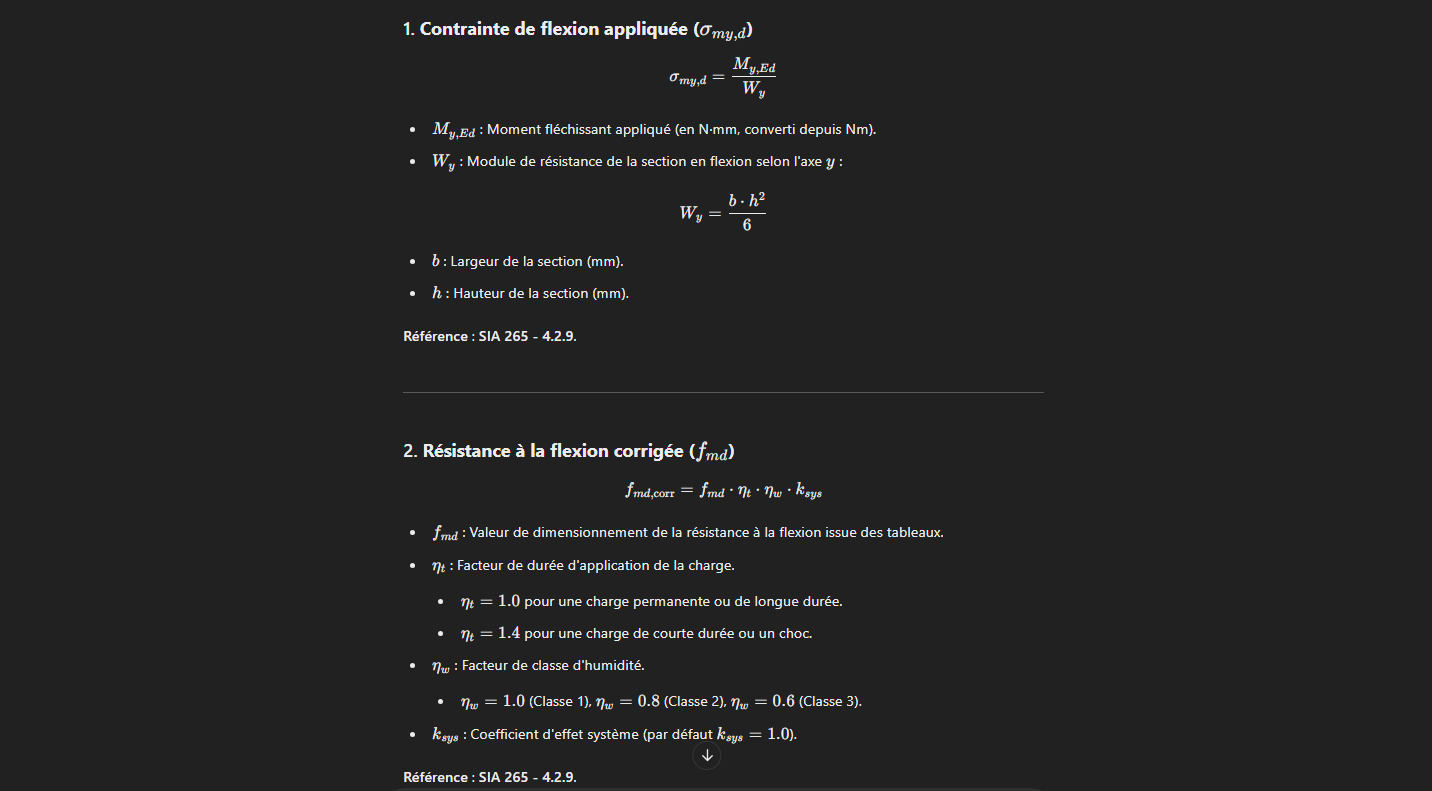
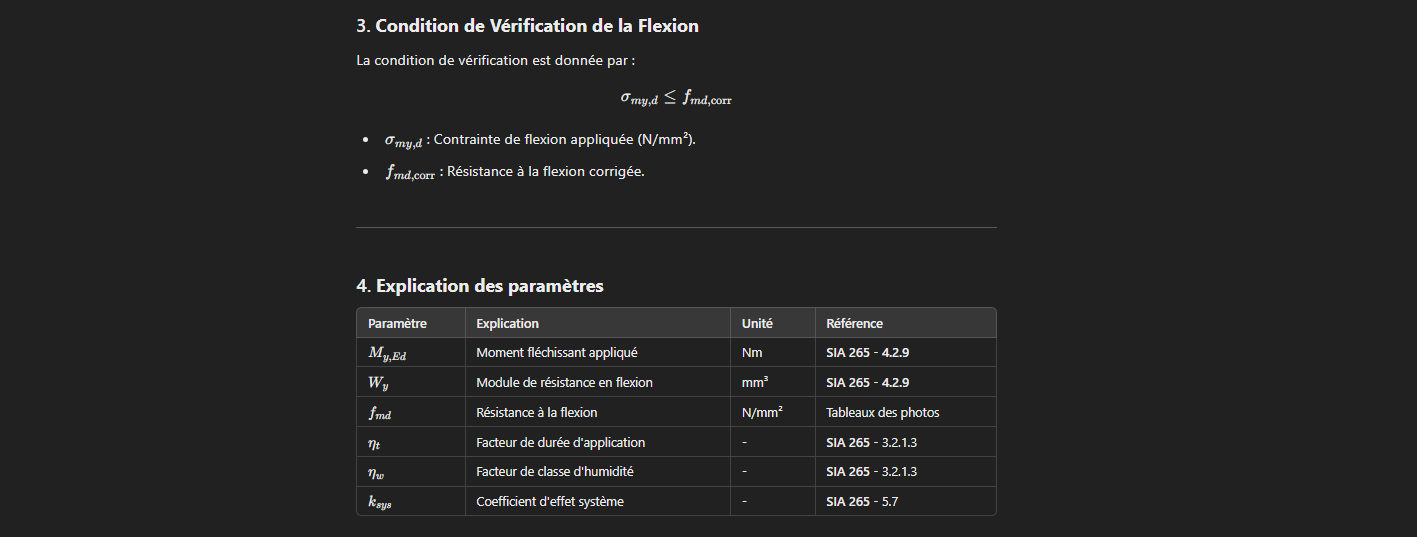
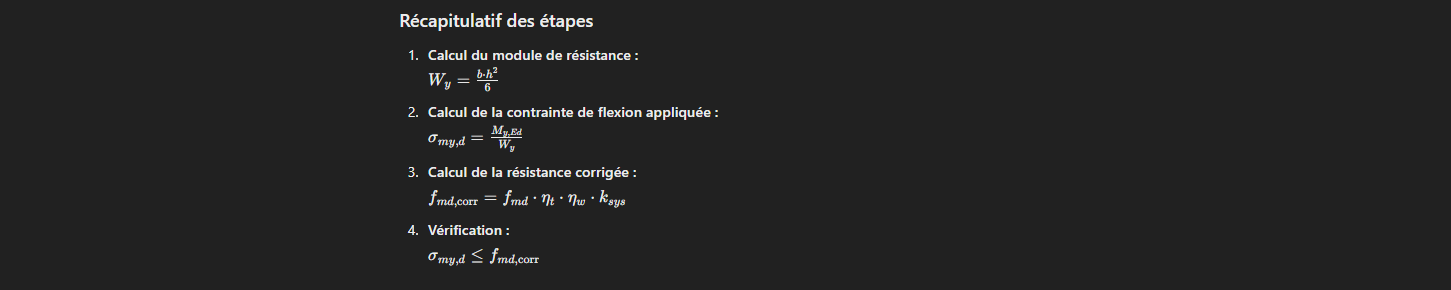

# Hauteur min avec b fixe 

In [13]:
import math

def hauteur_minimale(moment_flechissant_Nm, largeur, type_bois, classe_humidite, duree_application, ksys=1.0):
    """
    Calcule la hauteur minimale de la section pour respecter la vérification à la flexion monoaxiale (SIA 265 - 4.2.9).

    Arguments :
    - moment_flechissant_Nm : Moment fléchissant My,Ed (Nm)
    - largeur : Largeur de la section (b, mm)
    - type_bois : Classe du bois (ex: "C24", "GL28h")
    - classe_humidite : Classe d'humidité (1, 2 ou 3)
    - duree_application : Durée d'application de la charge ("infinie", "choc")
    - ksys : Coefficient d'effet système

    Retourne :
    - Hauteur minimale de la section (mm).
    """
    # Convertir le moment en Nmm
    moment_flechissant = moment_flechissant_Nm * 1e3  # Conversion de Nm à Nmm

    # Paramètres du bois
    f_md = parametres_bois[type_bois]["f_md"]  # Valeur de dimensionnement de la résistance à la flexion

    # Facteur modifiant en fonction de la durée d'application de la charge (eta_t)
    eta_t = {"infinie": 1.0, "choc": 1.4}.get(duree_application, 1.0)
    # Facteur modifiant en fonction de la classe d'humidité (eta_w)
    eta_w = {1: 1.0, 2: 0.8, 3: 0.6}.get(classe_humidite, 1.0)

    # Résistance à la flexion corrigée avec les modificateurs eta_t, eta_w et ksys
    f_md_corrigee = f_md * eta_t * eta_w * ksys

    # Calcul de la hauteur minimale
    h_min = math.sqrt((6 * moment_flechissant) / (f_md_corrigee * largeur))

    # Arrondi à l'entier supérieur
    h_min = math.ceil(h_min)

    # Affichage des résultats
    print("\n=== Calcul de la Hauteur Minimale (SIA 265 - 4.2.9) ===")
    print(f"Classe du bois : {type_bois}")
    print(f"Classe d'humidité : {classe_humidite}")
    print(f"Durée d'application : {duree_application}")
    print(f"Coefficient d'effet système (k_sys) : {ksys}")
    print(f"Moment fléchissant (My,Ed) : {moment_flechissant_Nm:.2f} Nm")
    print(f"Largeur de la section (b) : {largeur} mm")
    print(f"Résistance corrigée (f_md) : {f_md_corrigee:.2f} N/mm2")
    print(f"Hauteur minimale requise (h_min) : {h_min} mm")

    return h_min

# Exemple d'utilisation
type_bois = "C24"
moment_flechissant = 150000  # Nm
largeur = 200  # Largeur de la section en mm
classe_humidite = 1  # Classe 1
duree_application = "infinie"  # Durée d'application de la charge
ksys = 1.0  # Coefficient d'effet système

# Calcul
hauteur_min = hauteur_minimale(moment_flechissant, largeur, type_bois, classe_humidite, duree_application, ksys)
print(f"\nLa hauteur minimale de la section est : {hauteur_min} mm")



=== Calcul de la Hauteur Minimale (SIA 265 - 4.2.9) ===
Classe du bois : C24
Classe d'humidité : 1
Durée d'application : infinie
Coefficient d'effet système (k_sys) : 1.0
Moment fléchissant (My,Ed) : 150000.00 Nm
Largeur de la section (b) : 200 mm
Résistance corrigée (f_md) : 14.10 N/mm2
Hauteur minimale requise (h_min) : 565 mm

La hauteur minimale de la section est : 565 mm


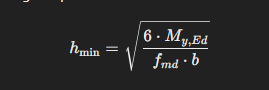

# Sections minimum standars 


=== Tableau des sections minimales par type de bois avec contraintes ===


,Type de bois,Largeur (mm),Hauteur (mm),Contrainte exercée (N/mm²),Contrainte max (N/mm²),Taux d'utilisation (%)
0,C16,120,300,8.333333,9.4,88.652482
1,C24,100,260,13.313609,14.1,94.422762
2,C30,100,240,15.625000,17.6,88.778409
3,D30,100,240,15.625000,17.6,88.778409
4,GL20h,100,280,11.479592,13.3,86.312721
5,GL24h,100,240,15.625000,16.0,97.656250
6,GL24c,100,240,15.625000,16.0,97.656250
7,GL28h,100,220,18.595041,18.7,99.438724
8,GL28c,100,220,18.595041,18.7,99.438724
9,GL32h,80,240,19.531250,21.3,91.696009


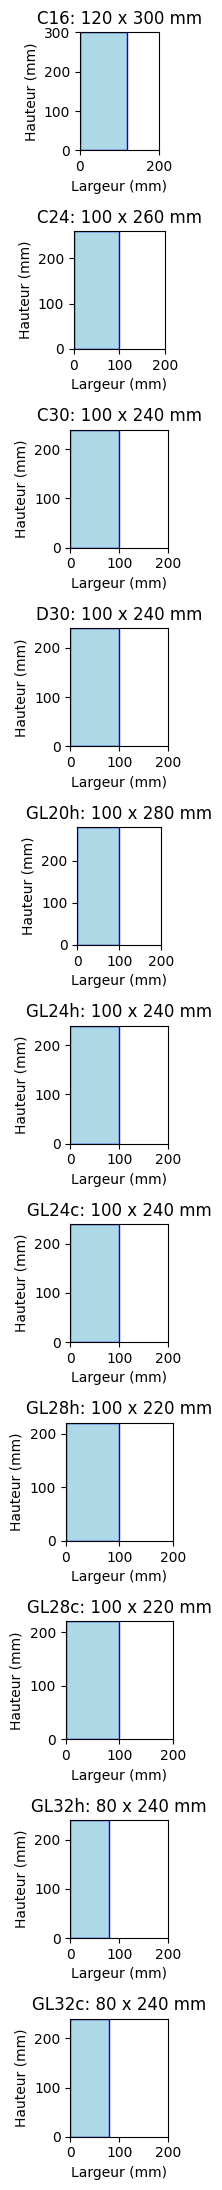

In [20]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def verifier_sections_standard(moment_flechissant_Nm, type_bois, classe_humidite, duree_application, ksys=1.0):
    """
    Trouve les sections standard minimales respectant la vérification à la flexion monoaxiale.
    """
    for categorie, dimensions in dimensions_standard.items():
        for largeur, hauteurs in dimensions:
            for hauteur in hauteurs:
                h_min_calculee = math.sqrt((6 * moment_flechissant_Nm * 1e3) / (parametres_bois[type_bois]['f_md'] * largeur * ksys))
                if hauteur >= h_min_calculee:
                    contrainte_exercee = moment_flechissant_Nm * 1e3 / ((largeur * hauteur**2) / 6)
                    taux_utilisation = contrainte_exercee / parametres_bois[type_bois]['f_md'] * 100
                    return largeur, hauteur, contrainte_exercee, parametres_bois[type_bois]['f_md'], taux_utilisation
    return None, None, None, None, None
# Calculer les sections minimales pour chaque type de bois
moment_flechissant = 15000  # Nm
classe_humidite = 1  # Classe 1
duree_application = "infinie"  # Durée d'application de la charge
ksys = 1.0  # Coefficient d'effet système

results = []
for type_bois in parametres_bois.keys():
    largeur, hauteur, contrainte_exercee, contrainte_max, taux_utilisation = verifier_sections_standard(
        moment_flechissant, type_bois, classe_humidite, duree_application, ksys
    )
    results.append({
        "Type de bois": type_bois,
        "Largeur (mm)": largeur,
        "Hauteur (mm)": hauteur,
        "Contrainte exercée (N/mm²)": contrainte_exercee,
        "Contrainte max (N/mm²)": contrainte_max,
        "Taux d'utilisation (%)": taux_utilisation,
    })

# Convertir les résultats en DataFrame pour un affichage clair
results_df = pd.DataFrame(results)

# Affichage propre
from IPython.display import display
print("\n=== Tableau des sections minimales par type de bois avec contraintes ===")
display(results_df)

# Génération des dessins des sections
fig, axes = plt.subplots(len(results), 1, figsize=(6, len(results) * 2))
if len(results) == 1:
    axes = [axes]  # Assure que axes est toujours une liste
for ax, result in zip(axes, results):
    largeur = result["Largeur (mm)"]
    hauteur = result["Hauteur (mm)"]
    type_bois = result["Type de bois"]

    # Dessiner la section
    ax.add_patch(plt.Rectangle((0, 0), largeur, hauteur, edgecolor="blue", facecolor="lightblue"))
    ax.set_xlim(0, max(largeur, 200))
    ax.set_ylim(0, max(hauteur, 200))
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(f"{type_bois}: {largeur} x {hauteur} mm")
    ax.set_xlabel("Largeur (mm)")
    ax.set_ylabel("Hauteur (mm)")

plt.tight_layout()
plt.show()


SOURCE :
 Dimensionement des structure en bois (aide a l'utilisation des normes SIA 260, 261 et 265)- Pierre André Dupraz - HEPIA 2023


 Lignum



 SIA 265